# Project 4: Chapter 4 - Functional Programming: Rudimentary Probability, Statistics, and Analytics

## Statistical Functions

In [1]:
import random

In [2]:
def total(lst):
    total_ = 0
    for val in lst:
        total_+= val
#     n = len(lst)
#     for i in range(n):
#         total_ += lst[i]
    return total_

X1 = [i for i in range(3,31, 3)]
X2 = [random.randint(0,10) for i in range(10)]
print("X1:",X1)
print("X2", X2)

X1: [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
X2 [10, 7, 5, 5, 10, 1, 3, 9, 8, 7]


In [3]:
total1 = total(X1)
total2 = total(X2)
print("Total of X1:",total1)
print("Total of X2:", total2)

Total of X1: 165
Total of X2: 65


In [4]:
def mean(lst):
    n = len(lst)
    mean_ = total(lst) / n
    return mean_

In [5]:
print("Mean of X1:", mean(X1))
print("Mean of X2", mean(X2))

Mean of X1: 16.5
Mean of X2 6.5


In [6]:
import numpy as np
np.mean(X1), np.mean(X2)

(16.5, 6.5)

### Median

The median is either 1) the value that appears exactly in the middle of the ordered list if the length of the list is odd or 2) the average of the two middle values that appear in the ordered list if the length of the list is even. 

In [7]:
def median(lst):
    n = len(lst)
    lst = sorted(lst)
    # the percent operator calculates the remander
    # Case 1: list is odd in length
    ## just select value from middle of list
    if n % 2 != 0:
        # coerce float to int
        middle_index = int((n - 1) / 2)
        median_ = lst[middle_index]
    # Case 2: list is even in length
    ## take the average of the middle two values
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        median_ = mean(lst[lower_middle_index : upper_middle_index + 1])
    return median_
median1 = median(X1)
median2 = median(X2)
print("Median of X1:", median1)
print("Median of X2:", median2)

Median of X1: 16.5
Median of X2: 7.0


In [8]:
def mode(lst):
    # use to record value(s)
    max_count = 0
    counter_dict = {}
    # use set if you don't want to define a value as zero multiple times
#     for value in set(lst):
    for value in lst:
        counter_dict[value] = 0
    for value in lst:
        counter_dict[value] += 1
    max_count = max(counter_dict.values())
    mode_ = [key for key in counter_dict.keys() if counter_dict[key] == max_count]
#     mode_ = [key for key, count in counter_dict.items() if count == max_count]
    
    return mode_

print("Mode of X1:", mode(X1))
print("Mode of X2:", mode(X2))

Mode of X1: [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
Mode of X2: [10, 7, 5]


In [9]:
def variance(lst, sample = True):
    list_mean = mean(lst)
    # use n to calculate average of sum squared diffs
    n = len(lst)
    DoF = n - 1
    sum_sq_diff = 0
    for val in lst:
        sum_sq_diff += (val - list_mean) ** 2
    # Case 1: list of values represent entire population
    if sample == False:
        # normalize result by dividing by n
        variance_ = sum_sq_diff / n
    # Case 2: list of values represents only a sample (subset)
    ## of the population
    else:
        # divide by DoF for sample
        variance_ = sum_sq_diff / DoF
    return variance_

In [10]:
print("Variance of X1:", variance(X1))
print("Variance of X2:", variance(X2))

Variance of X1: 82.5
Variance of X2: 8.944444444444445


Text(0, 6.5, 'Mean(X2)')

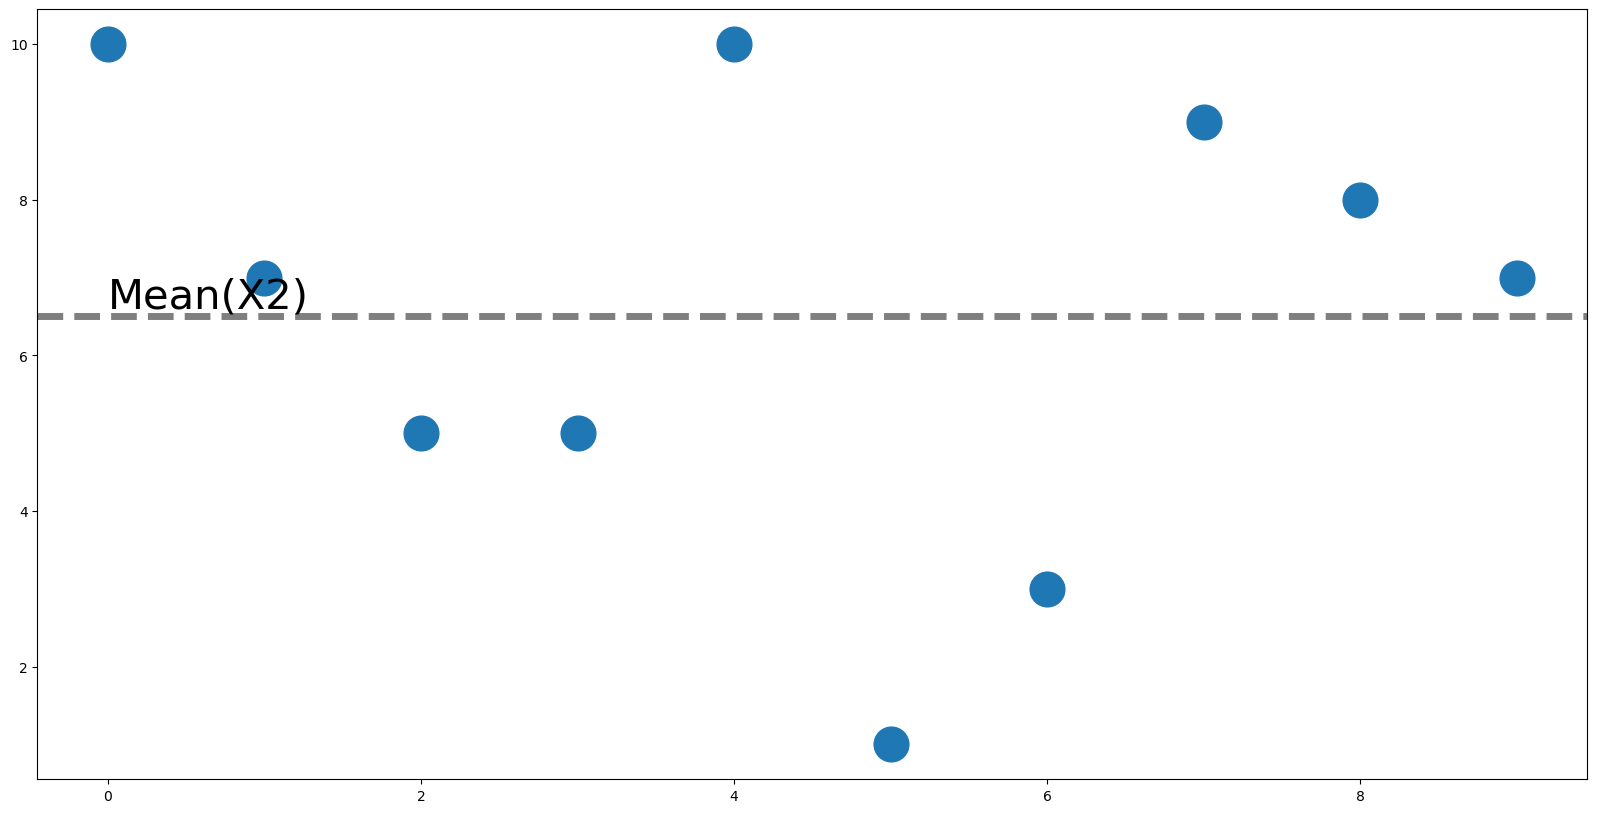

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20,10))
ax.plot(X2, ls = "", marker=".", markersize=50)
ax.axhline(mean(X2), linewidth = 5, alpha = .5, ls = "--", color = "k")
ax.text(0, mean(X2), "Mean(X2)", va = "bottom", fontsize = 30)
# for x in X2:
#     ax.axvline(xmin = x, xmax = mean(X2))

In [12]:
def SD(lst, sample = True):
    # Standard deviation is the square root of variance
    SD_ = variance(lst, sample) ** (1/2)
    return SD_

print("SD of X1:", SD(X1))
print("SD of X2:", SD(X2))

SD of X1: 9.082951062292475
SD of X2: 2.9907264074877267


In [13]:
def STE(lst, sample = True):
    n = len(lst)
    se = SD(lst, sample) / n ** (1/2)
    
    return se
print("SE of X1:", STE(X1))
print("SE of X2:", STE(X2))

SE of X1: 2.872281323269014
SE of X2: 0.9457507306074071


In [14]:
np.inf, np.inf*-1

(inf, -inf)

### Covariance

$cov_{pop}(x,y) = \frac{\sum_{i=0}^{n-1}{(x_i - x_{mean})(y_i - y_{mean})}}{n}$

In [15]:
def covariance(x, y, sample = False):
    meanx = mean(x)
    meany = mean(y)
    
    cov = 0
    nx = len(x)
    ny = len(y)
    if nx == ny:
        n = nx
        for i in range(n):
            cov += (x[i] - meanx) * (y[i] - meany)
        if sample == False:
            cov = cov / n
        else:
            cov = cov / (n-1)
        return cov
    else:
        print("List lengths are not equal.", nx, 
              "!=", ny)


In [16]:
covx1x2 = covariance(X1, X2, sample = True)
covx1x2

-2.5

In [17]:
covx1x2 = covariance(X1, X2[1:])
# covx1x2

List lengths are not equal. 10 != 9


### Correlation
$corr(x,y) = \frac{cov(x,y)}{\sigma_x \sigma_y}$

$corr(x,y) = \rho_{xy}$

Correlation normalizes $cov(x,y)$ ($\sigma_{xy}$) by dividing out the product of $\sigma_x$ and $\sigma_y$.

In [18]:
def correlation(x,y):
    cov = covariance(x,y)
    SDx = SD(x)
    SDy = SD(y)
    corr = cov / (SDx * SDy)
    return corr
corr_X1_X2 = correlation(X1,X2)
corr_X1_X2, corr_X1_X2 ** 2

(-0.0828283210838796, 0.0068605307735742525)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [20]:
simpsons = {j: [np.random.normal() * 20 + int(i/10)\
               for i in range(1000)] for j in range(10)}
# pd.DataFrame(simpsons).tail()
print(simpsons.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [21]:
values = []
for j in simpsons.keys():
    ix_interval = j * 100
    simpsons[j] = pd.DataFrame(
        simpsons[j], 
        # shift the index (x values) to the right)
        index = np.arange(
            ix_interval,              # shift y values down
            len(simpsons[j]) + ix_interval)).sub(j*35)
    # column for x
    simpsons[j]["Index"] = simpsons[j].index
    # column for entity that defines data generating process
    simpsons[j]["Entity"] = int(j)
    values = values + list(simpsons[j].values)
stacked_simpsons = pd.DataFrame(
    values,
    columns = ["y", "x", "Entity"])
stacked_simpsons.head()

y    x  Entity
0  -7.306013  0.0     0.0
1   0.925624  1.0     0.0
2  15.515746  2.0     0.0
3 -16.477318  3.0     0.0
4  14.555113  4.0     0.0

In [22]:
stacked_simpsons.corr()["x"]["y"]
# correlation(stacked_simpsons["x"],stacked_simpsons["y"])

-0.47458332887740934

In [23]:
stacked_simpsons[["Entity"]].value_counts()

Entity
0.0       1000
1.0       1000
2.0       1000
3.0       1000
4.0       1000
5.0       1000
6.0       1000
7.0       1000
8.0       1000
9.0       1000
Name: count, dtype: int64

Text(0.5, 1.0, 'Data appears to be negatively correlated\n-0.47')

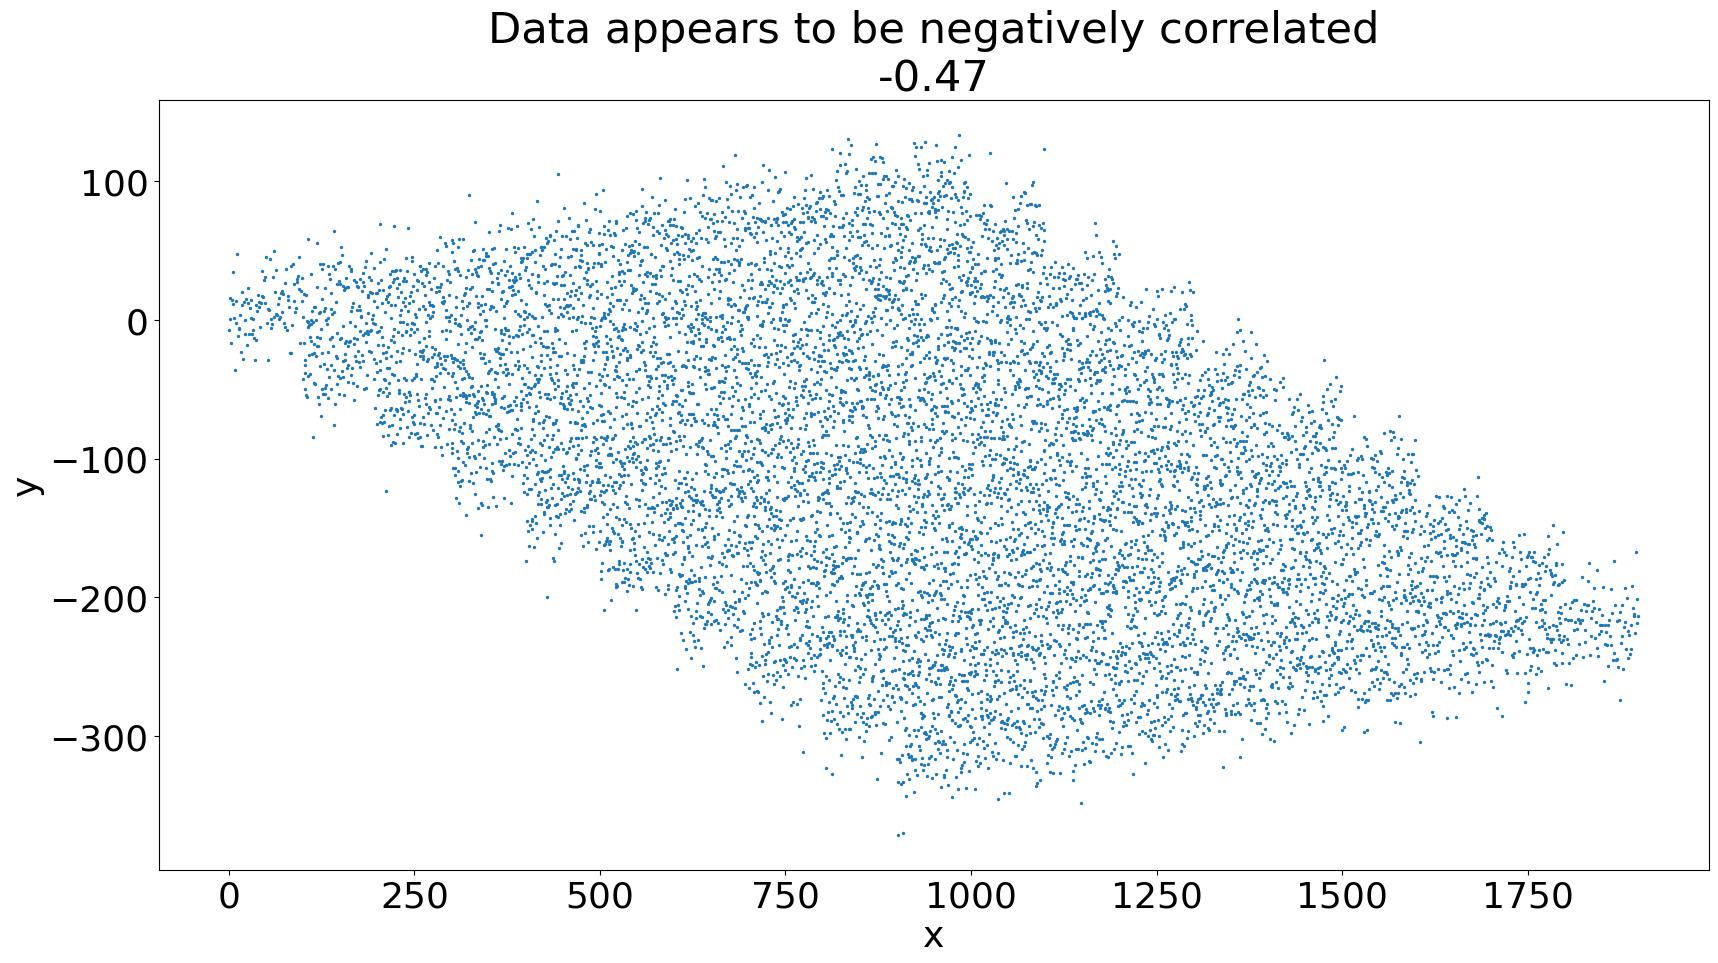

In [24]:
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (20,10))
stacked_simpsons.plot.scatter(x = "x",
                              y = "y",
                              s = 2,
                              c = "C0",
                              ax = ax)
pooled_correlation=str(round(correlation(stacked_simpsons["x"],
                                        stacked_simpsons["y"]),2))
ax.set_title(
    "Data appears to be negatively correlated\n" + pooled_correlation)


In [25]:
### !!!! Scary !!!!
corr_by_entity = stacked_simpsons.groupby("Entity").corr().round(2)
corr_by_entity[
    corr_by_entity.index.get_level_values(1) == "x"]["y"]

Entity   
0.0     x    0.83
1.0     x    0.83
2.0     x    0.83
3.0     x    0.82
4.0     x    0.83
5.0     x    0.81
6.0     x    0.83
7.0     x    0.85
8.0     x    0.82
9.0     x    0.83
Name: y, dtype: float64

Text(0.5, 1.0, 'With Group Controls Correlations is Positive')

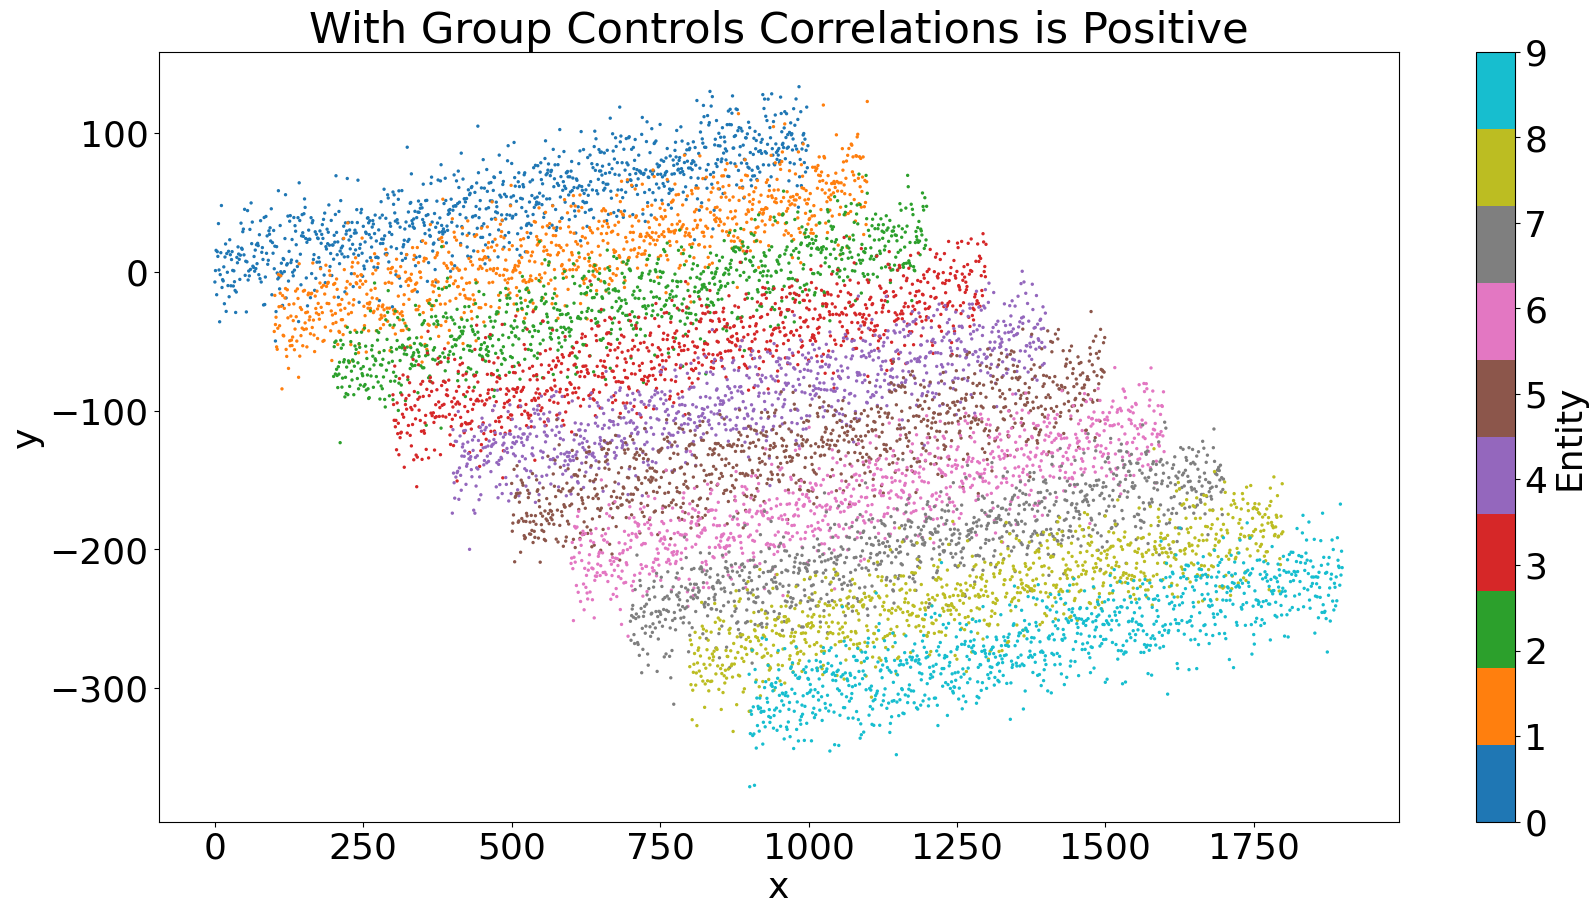

In [26]:
import matplotlib.cm as cm

fig, ax = plt.subplots(figsize=(20, 10))
# cmap = cm.get_cmap('tab10')
stacked_simpsons.plot.scatter(x="x",
                              y="y",
                              s=2,
#                               alpha = .1,
                              # color by entity
                              c="Entity",
                              cmap="tab10", 
                              ax=ax)

ax.set_title("With Group Controls Correlations is Positive")


## Simpsons Paradox and Drug Trials


In [27]:
csv_url =  "https://raw.githubusercontent.com/PacktPublishing/Causal-Inference-and-Discovery-in-Python/main/data/ch_01_drug_data.csv"
data = pd.read_csv(csv_url).set_index("Drug").T.reset_index()
for ab in ("A","B"):
    data["index"][data["index"] == ab + ".1"] = ab


C:\Users\JLCat\AppData\Local\Temp\ipykernel_20772\3510863551.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["index"][data["index"] == ab + ".1"] = ab
C:\Users\JLCat\AppData\Local\Temp\ipykernel_20772\3510863551.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["index"][data["index"] == ab + ".1"] = ab


In [28]:
data.rename(columns={"index":"Drug"}, inplace = True)
data#.reset_index()

Drug Drug  Clot  Female  Male  Total
0       A     1      24     3     27
1       A     0      56    39     95
2       B     1      17     6     23
3       B     0      25    74     99

In [29]:
# unstack makes columns out of a secondary index
plot_df = data.groupby(["Drug", "Clot"])["Total"].sum().unstack()

<Axes: xlabel='Drug'>

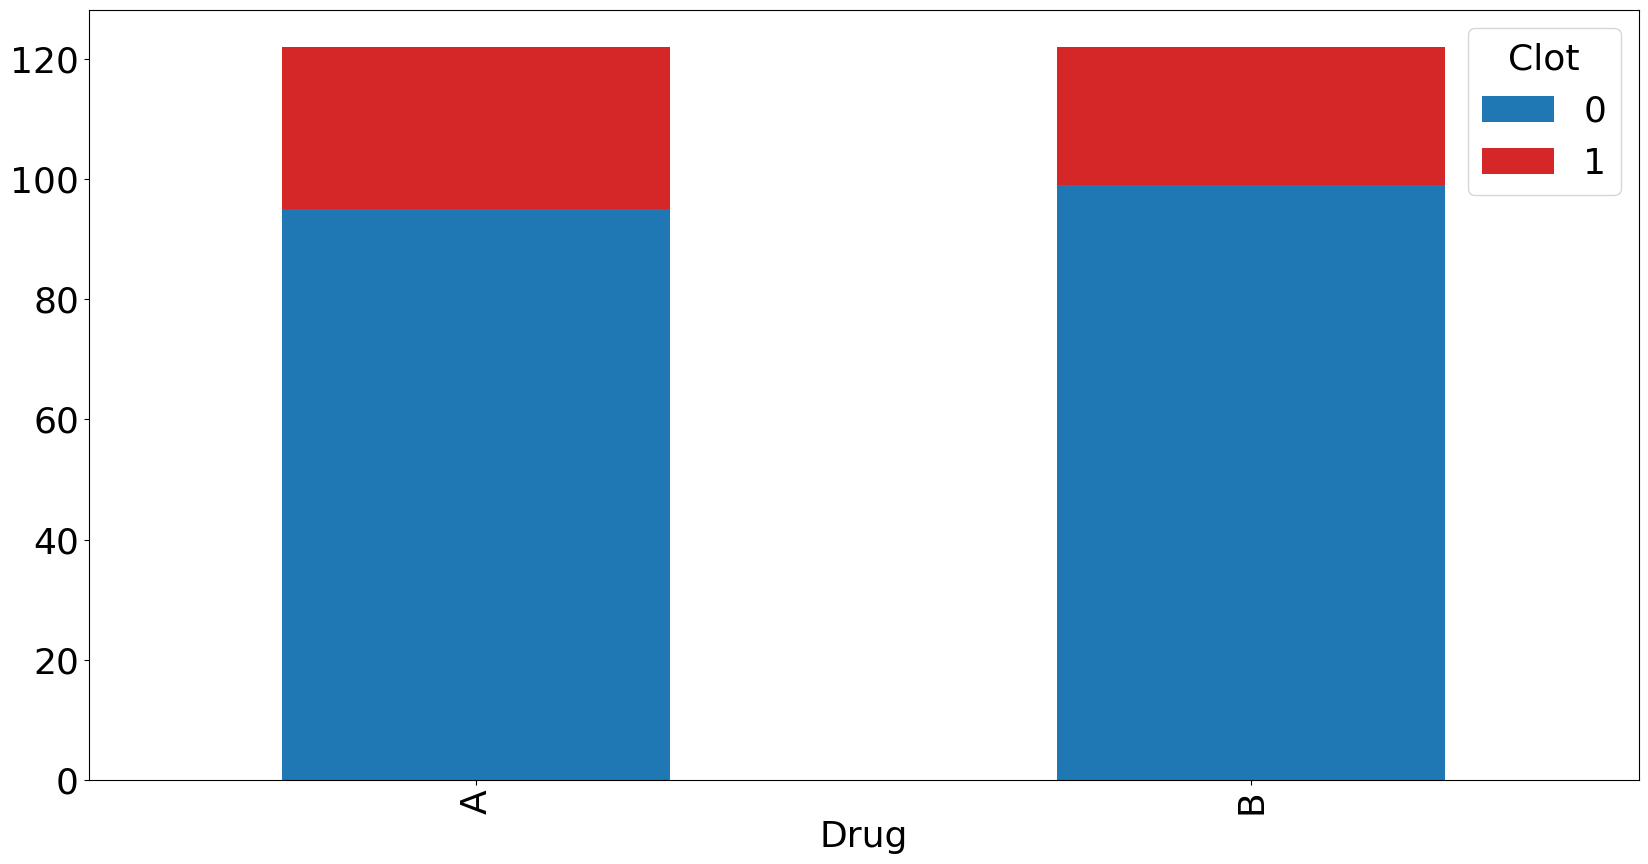

In [30]:
colors = ["C0", "C3"]
fig, ax = plt.subplots(figsize = (20,10))
plot_df.plot.bar(stacked = True, 
                 legend = True, 
                 color = colors,
                 ax = ax)

In [31]:
import plotly.graph_objects as go
fig = go.Figure()

# Adding each stack (clot type in this case) as a separate trace
for clot_type in plot_df.columns:
    fig.add_trace(go.Bar(
        x=plot_df.index,
        y=plot_df[clot_type],
        name="Clot: " + str(clot_type)
    ))

# Update layout for a stacked bar plot
fig.update_layout(
    barmode='stack',
    title='Clotting by Drug',
    xaxis_title='Drug',
    yaxis_title='Total'#,
#     legend_title='Clot Type'
)

# Show the plot
fig.show()

### Gender is not evenly distributed between trials

In [32]:
plot_df = data.groupby(["Drug", "Clot"])[["Male", "Female"]].sum().unstack().T
plot_df.index.names = ("Gender", "Clot")
# transpose so we can stack data by row in bar graph.
plot_df = plot_df.groupby("Gender").sum().T
plot_df

Gender  Female  Male
Drug                
A           80    42
B           42    80

<Axes: xlabel='Drug'>

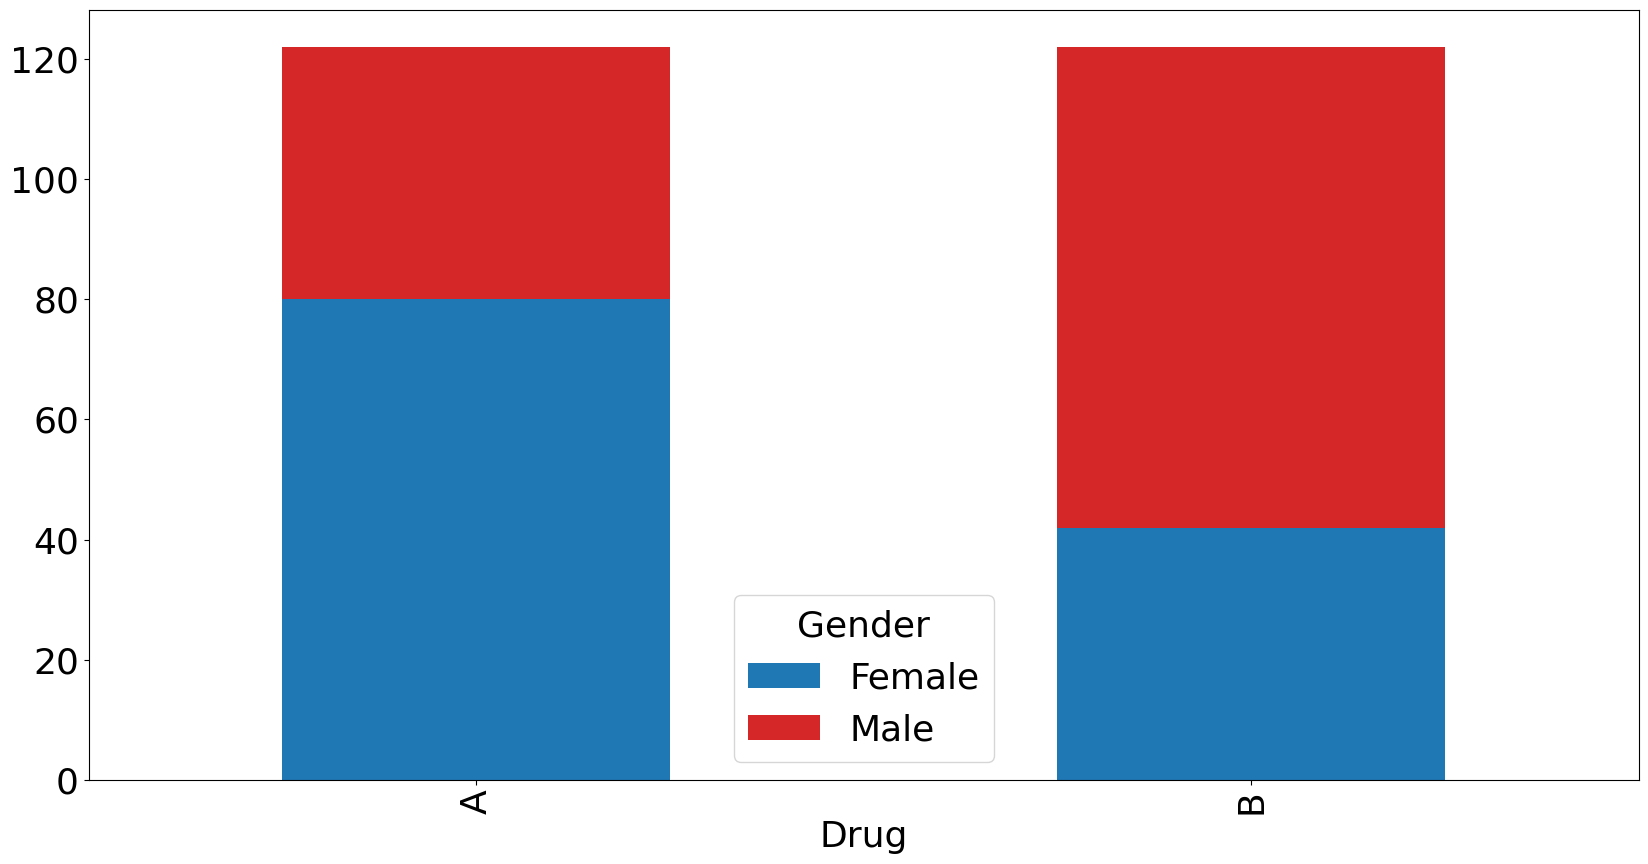

In [33]:
fig, ax = plt.subplots(figsize = (20,10))
plot_df.plot.bar(ax = ax, 
                 stacked = True, 
                 color = colors, 
                 legend = True)

In [34]:
plot_df = data.groupby(["Drug","Clot"])[["Male", "Female"]].sum().unstack().T
plot_df.index.names = ("Gender", "Clot")
plot_df = plot_df.groupby("Gender").sum().T

# Create an interactive stacked bar plot using Plotly
fig = go.Figure()

# Adding each stack (gender in this case) as a separate trace
for gender in plot_df.columns:
    fig.add_trace(go.Bar(
        x=plot_df.index,
        y=plot_df[gender],
        name=str(gender)
    ))

# Update layout for a stacked bar plot
fig.update_layout(
    barmode='stack',
    title='Gender Composition by Drug Trial',
    xaxis_title='Drug',
    yaxis_title='Total Count',
    legend_title='Gender'
)

# Show the plot
fig.show()

### Present Results for Each Trial Controlling for Gender

In [35]:
plot_df = data.groupby(["Clot", "Drug"])[["Male", "Female", "Total"]].sum().unstack().T
plot_df

Clot          0   1
Drug   Drug        
Male   A     39   3
       B     74   6
Female A     56  24
       B     25  17
Total  A     95  27
       B     99  23

In [36]:
pct_df = plot_df.copy()
for key in pct_df.keys():

    # Divide values in each row by row total; .sum(axis = 1) sums by row
    pct_df[key] = pct_df[key].div(plot_df.sum(axis = 1))

# pct_df_total = pct_df.loc[["Total"]]

pct_df.round(3)

Clot             0      1
Drug   Drug              
Male   A     0.929  0.071
       B     0.925  0.075
Female A     0.700  0.300
       B     0.595  0.405
Total  A     0.779  0.221
       B     0.811  0.189

<Axes: xlabel='Drug,Drug'>

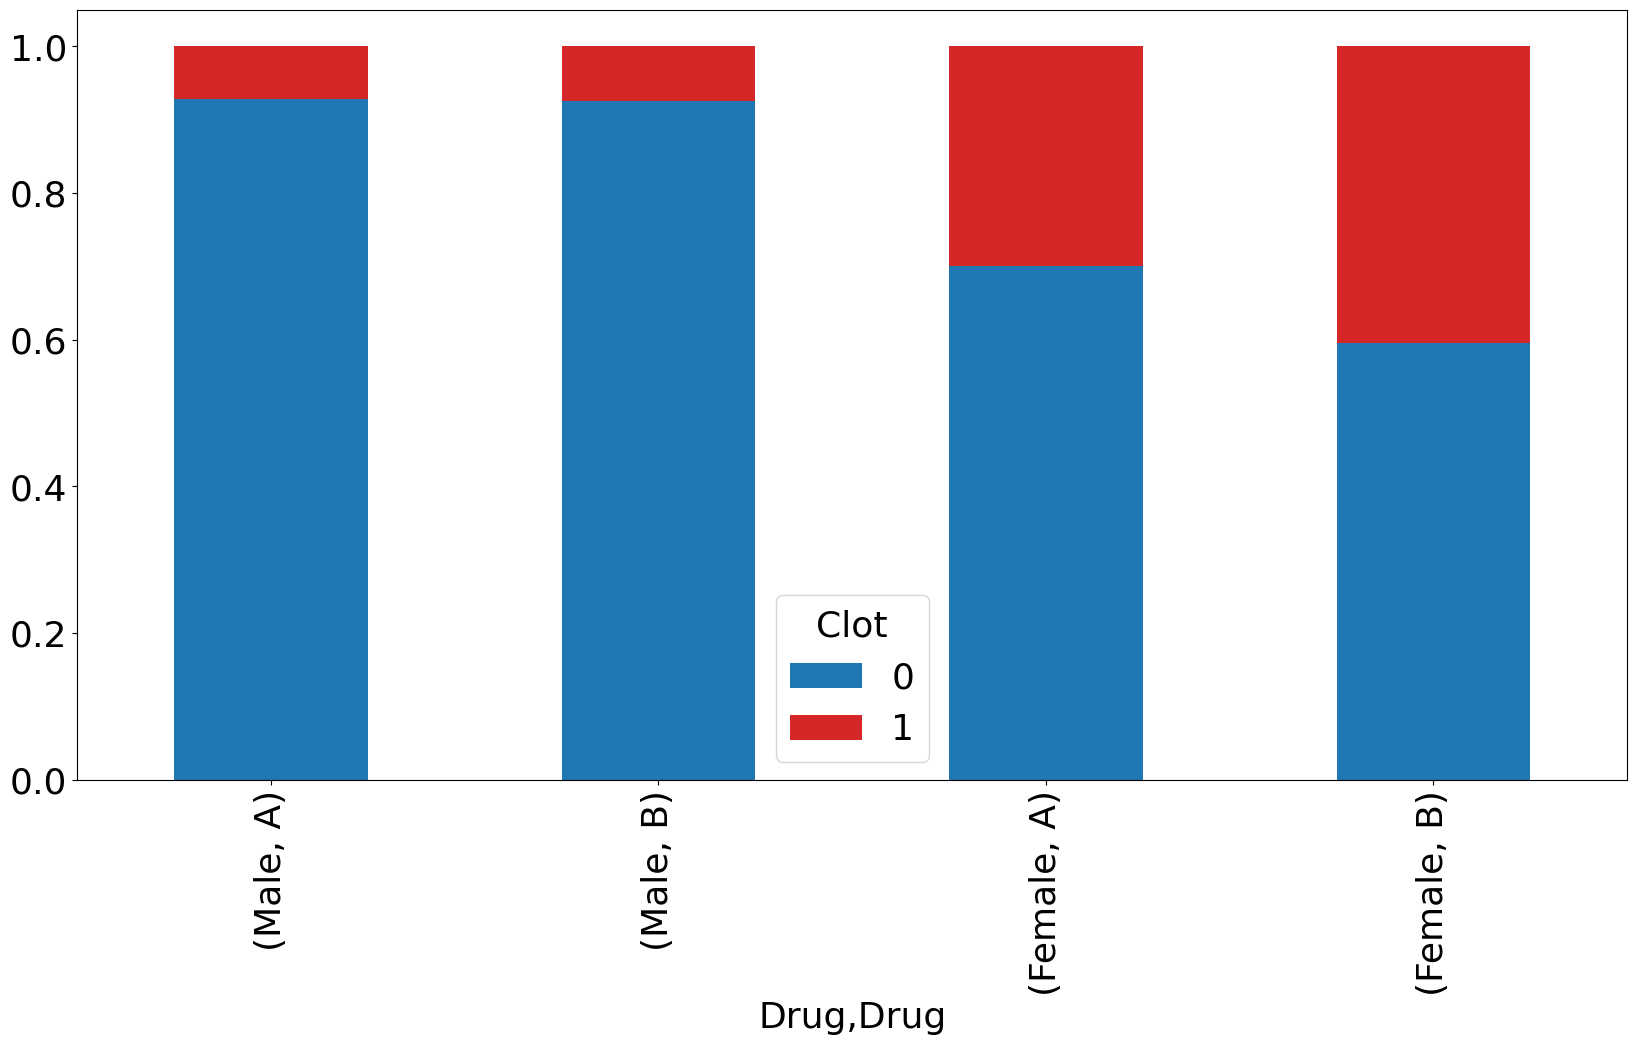

In [37]:
fig, ax = plt.subplots(figsize = (20,10))
# plot by male and female
pct_df.loc[["Male", "Female"]].plot.bar(
    ax = ax,
    # every bar separates values within row, by column
    stacked = ["Clot"],
    color = colors,
    legend = True
)

In [40]:
pct_df_gender = pct_df.loc[["Male", "Female"]].round(3)
color_map = {
    0: 'blue',  # Color for Clot 0
    1: 'red'    # Color for Clot 1
}

# Transparency (alpha) values for gender
opacity_map = {
    'Male': 1,    # Opaque for males
    'Female': 0.6  # More transparent for females
}

# Initialize an empty figure
fig = go.Figure()

# Iterate through the DataFrame and add a bar for each gender and drug combination
for (gender, drug), values in pct_df_gender.iterrows():
    for clot in range(len(values)):
        fig.add_trace(go.Bar(
            name=f"Clot {clot}",  # We will use this in the legend
            x=[f"{gender} {drug}"],
            y=[values[clot]],
            marker=dict(color=color_map[clot], opacity=opacity_map[gender]),
            legendgroup=f"Clot {clot}",
            showlegend=False  # We do not show these traces in the legend
        ))

# Add two traces for the legend
for clot in [0, 1]:
    fig.add_trace(go.Bar(
        name=f"Clot {clot}",
        x=[None],
        y=[None],
        marker=dict(color=color_map[clot], opacity=1),
        legendgroup=f"Clot: {clot}",
        showlegend=True
    ))

# Update layout for stacked bar plot
fig.update_layout(
    barmode='stack',
    title='Clots by Gender and Drug',
    xaxis=dict(title='Drug', type='category'),
    yaxis=dict(title='Percentage'),
    legend_title='Clot',
    legend=dict(
        traceorder='normal',
        orientation='h',
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Show the plot
fig.show()



$skew_{pop}(x,y) = \frac{\sum_{i=0}^{n-1}{(x_{i} - x_{mean})^3}} {n\sigma^3}$


$skew_{sample}(x,y) = \frac{\sum_{i=0}^{n-1}{(x_{i} - x_{mean})^3}} {(n-1)(n-2)\sigma^3}$

In [41]:
#statsFunctions.py
# . . . 
def skewness(lst, sample = False):
    mean_ = mean(lst)
    SD_ = SD(lst, sample)
    skew = 0
    n = len(lst)
    for val in lst:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ ** 3) if not sample else  skew / ((n - 1)*(n - 2) * SD_ ** 3)
        
    return skew

# . . . 
skew1 = skewness(X1, sample = False)
skew2 = skewness(X2, sample = False)
print("skewness of list1:", skew1)
print("skewness of list2:", skew2)
sample_skew1 = skewness(X1, sample = True)
sample_skew2 = skewness(X2, sample = True)
print("sample skewness of list1:", sample_skew1)
print("sample skewness of list2:", sample_skew2)

skewness of list1: 0.0
skewness of list2: -0.4859920424247005
sample skewness of list1: 0.0
sample skewness of list2: -0.05763156670422128


$kurt_{pop} = \frac{\sum_{i=0}^{n-1} (x_{i} - x_{mean})^4} {n\sigma^4}$

$kurt_{sample} = \frac{n(n+1)\sum_{i=0}^{n-1} (x_{i} - x_{mean})^4} {(n - 1)(n - 2)( n - 3)\sigma^4} - \frac{3(n - 1)^2}{(n - 2)(n - 3)}$


In [42]:
#statsFunctions.py
# . . .
def kurtosis(lst, sample = False):
    mean_ = mean(lst)
    kurt = 0
    SD_ = SD(lst, sample)
    n = len(lst)
    for x in lst:
        kurt += (x - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if  sample == False else  n * (n + 1) * kurt / \
    ((n - 1) * (n - 2) * (n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

# . . .
kurt1 = kurtosis(X1)
kurt2 = kurtosis(X2)
print("kurtosis of list1:", kurt1)
print("kurtosis of list2:", kurt2)
sample_kurt1 = kurtosis(X1, sample = True)  
sample_kurt2 = kurtosis(X2, sample = True)  
print("sample kurtosis of list1:", sample_kurt1)  
print("sample kurtosis of list2:", sample_kurt2)

kurtosis of list1: 1.7757575757575759
kurtosis of list2: 2.190694803441225
sample kurtosis of list1: -1.1999999999999997
sample kurtosis of list2: -0.46645025820211883


## Using a Nested Dictionary to Organize Statistics

In [43]:
stats_dict = {}
stats_dict["X1"] = {}
stats_dict["X1"]["list"] = X1
stats_dict["X2"] = {}
stats_dict["X2"]["list"] = X2
stats_dict

{'X1': {'list': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]},
 'X2': {'list': [10, 7, 5, 5, 10, 1, 3, 9, 8, 7]}}

In [46]:
for key in stats_dict.keys():
    lst = stats_dict[key]["list"]
    stats_dict[key]["total"] = total(lst)
    stats_dict[key]["mean"] = mean(lst)
    stats_dict[key]["median"] = median(lst)
    stats_dict[key]["mode"] = mode(lst)
    stats_dict[key]["variance"] = variance(lst)
    stats_dict[key]["standard deviation"] = SD(lst)
    stats_dict[key]["standard error"] = STE(lst)
    stats_dict[key]["skewness"] = skewness(lst)
    stats_dict[key]["kurtosis"] = kurtosis(lst)
stats_dict

{'X1': {'list': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30],
  'total': 165,
  'mean': 16.5,
  'median': 16.5,
  'mode': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30],
  'variance': 82.5,
  'standard deviation': 9.082951062292475,
  'standard error': 2.872281323269014,
  'skewness': 0.0,
  'kurtosis': 1.7757575757575759},
 'X2': {'list': [10, 7, 5, 5, 10, 1, 3, 9, 8, 7],
  'total': 65,
  'mean': 6.5,
  'median': 7.0,
  'mode': [10, 7, 5],
  'variance': 8.944444444444445,
  'standard deviation': 2.9907264074877267,
  'standard error': 0.9457507306074071,
  'skewness': -0.4859920424247005,
  'kurtosis': 2.190694803441225}}

In [47]:
stats_df = pd.DataFrame(stats_dict)
stats_df

X1  \
list                [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]   
total                                                 165   
mean                                                 16.5   
median                                               16.5   
mode                [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]   
variance                                             82.5   
standard deviation                               9.082951   
standard error                                   2.872281   
skewness                                              0.0   
kurtosis                                         1.775758   

                                                  X2  
list                [10, 7, 5, 5, 10, 1, 3, 9, 8, 7]  
total                                             65  
mean                                             6.5  
median                                           7.0  
mode                                      [10, 7, 5]  
variance                                    8.944444  
standard deviation                          2.990726  
standard error                              0.945751  
skewness                                   -0.485992  
kurtosis                                    2.190695

In [49]:
stat_names = ["total", 
              "mean", 
              "median", 
              "standard deviation", 
              "standard error",
             "skewness",
             "kurtosis"]
stats_df.loc[stat_names]

X1        X2
total                    165        65
mean                    16.5       6.5
median                  16.5       7.0
standard deviation  9.082951  2.990726
standard error      2.872281  0.945751
skewness                 0.0 -0.485992
kurtosis            1.775758  2.190695

In [54]:
pd.DataFrame(X1).describe()

0
count  10.000000
mean   16.500000
std     9.082951
min     3.000000
25%     9.750000
50%    16.500000
75%    23.250000
max    30.000000

In [70]:
def gather_statistics(df, sample = True, round_to = 3):
    # create an entry in the dictionary for each column of data
    dct = {key:{} for key in df}
    
    for key, vals in df.items():
        # .dropna(axis = 0)  drops any row with a null value 
        ## axis = 1 would drop any column with a null value
        vals = vals.dropna(axis=0)
        dct[key]["mean"] = round(mean(vals), round_to)
        dct[key]["median"] = round(median(vals), round_to)
        dct[key]["variance"] = round(variance(vals, sample), round_to)
        dct[key]["SD"] = round(SD(vals, sample), round_to)
        dct[key]["SE"] = round(STE(vals, sample), round_to)
        dct[key]["skewness"] = round(skewness(vals, sample), round_to)
        dct[key]["kurtosis"] = round(kurtosis(vals, sample), round_to)
            
    stats_df = pd.DataFrame(dct)
    return stats_df

data = pd.DataFrame([X1, X2], 
                    index = ["List1", "List2"]).T
gather_statistics(data, sample = False, round_to = 1)

List1  List2
mean       16.5    6.5
median     16.5    7.0
variance   74.2    8.1
SD          8.6    2.8
SE          2.7    0.9
skewness    0.0   -0.5
kurtosis    1.8    2.2

In [83]:
import stats
dir(stats)

['SD',
 'STE',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'correlation',
 'covariance',
 'gather_statistics',
 'kurtosis',
 'mean',
 'median',
 'mode',
 'pd',
 'skewness',
 'total',
 'variance']

In [85]:
stats.mean(X1)

16.5